✅ Đã load dữ liệu thật: 20 epochs


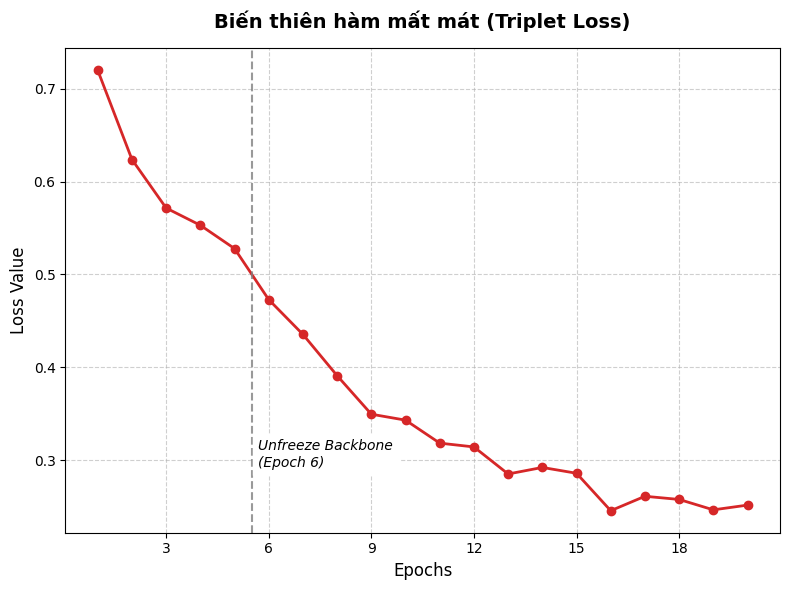

💾 Đã lưu: chart_loss.png


/tmp/ipykernel_17/3917539693.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in current_values])


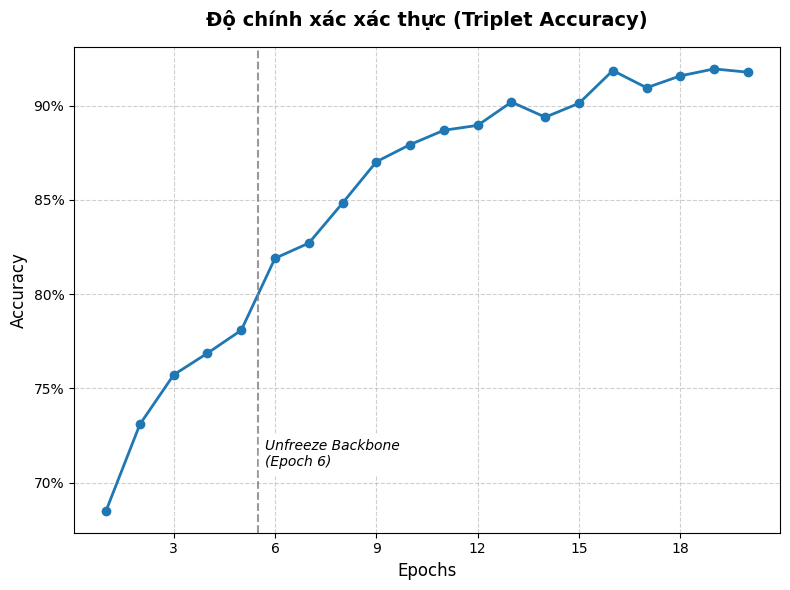

💾 Đã lưu: chart_accuracy.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # <--- THÊM THƯ VIỆN NÀY

# ==========================================
# 1. LOAD DỮ LIỆU
# ==========================================
try:
    loss_history = np.load('/kaggle/input/deeplearn-resnet-eff-fusion-v4/train_loss.npy')
    acc_history = np.load('/kaggle/input/deeplearn-resnet-eff-fusion-v4/train_accuracy.npy')
    print(f"✅ Đã load dữ liệu thật: {len(loss_history)} epochs")
except FileNotFoundError:
    print("⚠️ Không tìm thấy file! Đang dùng dữ liệu giả lập để test...")
    # Dữ liệu giả lập để test nếu không có file
    loss_history = np.array([0.5, 0.4, 0.35, 0.3, 0.28, 0.24, 0.20, 0.15, 0.10, 0.08])
    acc_history = np.array([0.80, 0.85, 0.88, 0.90, 0.91, 0.94, 0.95, 0.96, 0.98, 0.985])

epochs = range(1, len(loss_history) + 1)

# Hàm vẽ chung để code gọn đẹp
def draw_chart(x_data, y_data, title, y_label, color, filename, is_acc=False):
    plt.figure(figsize=(8, 6)) # Kích thước chuẩn cho báo cáo A4
    
    # Vẽ đường
    plt.plot(x_data, y_data, color=color, marker='o', linestyle='-', linewidth=2, markersize=6)
    
    # Trang trí
    plt.title(title, fontsize=14, fontweight='bold', pad=15)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # --- SỬA LỖI SỐ NGUYÊN ---
    ax = plt.gca() # Lấy trục hiện tại
    # Ép buộc trục X chỉ hiển thị số nguyên
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    # -------------------------

    # Đánh dấu điểm Unfreeze (Epoch 6) - Cực kỳ quan trọng cho báo cáo
    if len(x_data) >= 6:
        plt.axvline(x=5.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
        # Ghi chú thích
        text_y = min(y_data) + (max(y_data) - min(y_data)) * 0.1 # Tự động căn vị trí text
        plt.text(5.7, text_y, 'Unfreeze Backbone\n(Epoch 6)', color='black', fontsize=10, style='italic', backgroundcolor='white')

    # Nếu là Accuracy thì format trục Y theo %
    if is_acc:
        current_values = ax.get_yticks() # Sửa lại dùng ax cho đồng bộ
        ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in current_values])

    plt.tight_layout()
    plt.savefig(filename, dpi=300) # Lưu ảnh nét căng
    plt.show()
    print(f"💾 Đã lưu: {filename}")

# ==========================================
# 2. VẼ VÀ LƯU 2 BIỂU ĐỒ
# ==========================================

# --- Biểu đồ 1: Loss ---
draw_chart(epochs, loss_history, 
           title='Biến thiên hàm mất mát (Triplet Loss)', 
           y_label='Loss Value', 
           color='#d62728', # Màu đỏ đẹp
           filename='chart_loss.png')

# --- Biểu đồ 2: Accuracy ---
draw_chart(epochs, acc_history, 
           title='Độ chính xác xác thực (Triplet Accuracy)', 
           y_label='Accuracy', 
           color='#1f77b4', # Màu xanh đẹp
           filename='chart_accuracy.png',
           is_acc=True)